In [32]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import math

In [33]:
df = pd.read_csv("adult.csv")

In [34]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [35]:
df.shape

(32561, 15)

In [36]:
df.workclass.unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [37]:
df.occupation.unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [38]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [40]:
df = df.sample(frac=0.1, random_state = 1)

''

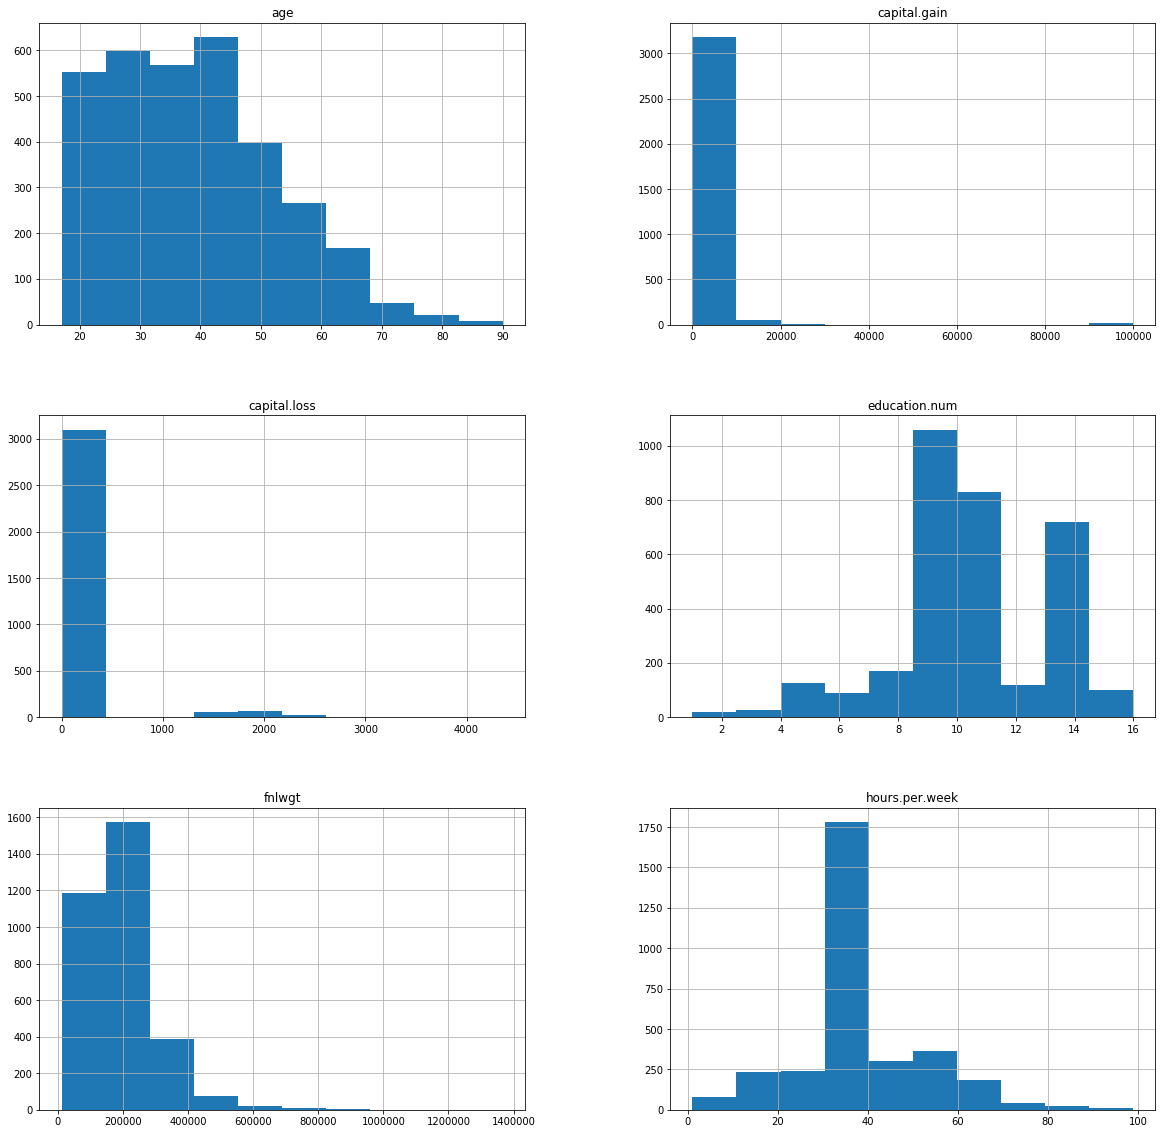

In [59]:
hist = df.hist(figsize = (20,20))
hist
;

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
lbl_workclass = LabelEncoder()
lbl_marital = LabelEncoder()
lbl_education = LabelEncoder()
lbl_occupation = LabelEncoder()
lbl_relationship = LabelEncoder()
lbl_race = LabelEncoder()
lbl_sex = LabelEncoder()
lbl_native = LabelEncoder()
lbl_income = LabelEncoder()

In [43]:
inputs = df.drop('income', axis = 1)
target = df['income']

In [44]:
inputs['workclass_n'] = lbl_workclass.fit_transform(inputs['workclass'])
inputs['marital_n'] = lbl_marital.fit_transform(inputs['marital.status'])
inputs['education_n'] = lbl_education.fit_transform(inputs['education'])
inputs['occupation_n'] = lbl_occupation.fit_transform(inputs['occupation'])
inputs['relationship_n'] = lbl_relationship.fit_transform(inputs['relationship'])
inputs['race_n'] = lbl_race.fit_transform(inputs['race'])
inputs['sex_n'] = lbl_sex.fit_transform(inputs['sex'])
inputs['native_n'] = lbl_native.fit_transform(inputs['native.country'])

In [45]:
inputs.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,hours.per.week,native.country,workclass_n,marital_n,education_n,occupation_n,relationship_n,race_n,sex_n,native_n
9646,24,Private,336088,HS-grad,9,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,...,50,United-States,3,0,11,3,1,0,0,36
709,34,Federal-gov,190228,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,...,48,United-States,1,2,9,10,0,4,1,36
7385,18,Private,104704,HS-grad,9,Never-married,Adm-clerical,Own-child,Black,Male,...,40,United-States,3,4,11,1,3,2,1,36
16671,44,Private,36271,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,...,40,United-States,3,2,9,2,0,4,1,36
21932,27,Private,178709,Masters,14,Never-married,Machine-op-inspct,Not-in-family,White,Female,...,40,United-States,3,4,12,6,1,4,0,36


In [78]:
inputs = inputs.drop(['workclass', 'education', 'relationship', 'occupation', 'marital.status', 'race', 'sex', 'native.country'], axis = 1)

In [79]:
inputs.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_n,marital_n,education_n,occupation_n,relationship_n,race_n,sex_n,native_n
count,3256.000000,3.256000e+03,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000
mean,38.767813,1.901058e+05,10.099816,1039.650491,90.968366,40.157862,3.007371,2.642506,10.279177,5.750307,1.446253,3.663698,0.664312,33.952396
std,13.857232,1.101112e+05,2.580475,7182.890252,411.810173,12.574043,1.223405,1.512252,3.860041,4.003838,1.591895,0.857738,0.472303,7.083605
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.750000,1.157672e+05,9.000000,0.000000,0.000000,40.000000,3.000000,2.000000,9.000000,2.000000,0.000000,4.000000,0.000000,36.000000
50%,37.000000,1.782920e+05,10.000000,0.000000,0.000000,40.000000,3.000000,2.000000,11.000000,6.000000,1.000000,4.000000,1.000000,36.000000
75%,48.000000,2.368588e+05,13.000000,0.000000,0.000000,45.000000,3.000000,4.000000,12.000000,9.000000,3.000000,4.000000,1.000000,36.000000
max,90.000000,1.366120e+06,16.000000,99999.000000,4356.000000,99.000000,7.000000,6.000000,15.000000,13.000000,5.000000,4.000000,1.000000,38.000000


In [80]:
Below = df[df['income'] == '<=50K']
Above = df[df['income'] == '>50K']
outlier_fraction = len(Below)/ float(len(Above))
print(outlier_fraction)
print('Below 50K: ' + str(len(Below)))
print('Above 50K: ' + str(len(Above)))

3.1319796954314723
Below 50K: 2468
Above 50K: 788


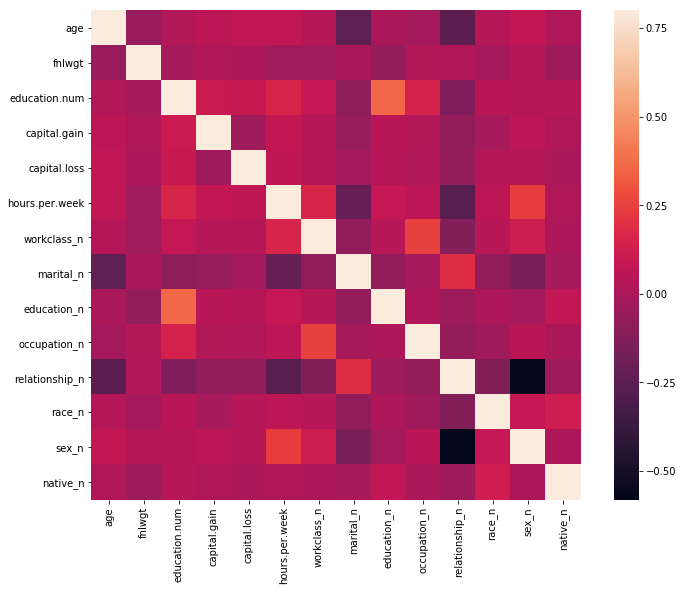

In [81]:
corr = inputs.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corr, vmax = 0.8, square = True)
plt.show()

In [98]:
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2)

In [94]:
classifier = tree.DecisionTreeClassifier()  
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [95]:
y_pred = classifier.predict(X_test)

In [96]:
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred)) 
print("Accuracy: \n", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix: 
 [[420  76]
 [ 61  95]]
Accuracy: 
 0.7898773006134969
             precision    recall  f1-score   support

      <=50K       0.87      0.85      0.86       496
       >50K       0.56      0.61      0.58       156

avg / total       0.80      0.79      0.79       652

